# CSGO project 

- Build and compare multiple machine learning algorithms for the classificatoin of round winners in the game CSGO. 
- Using LDA for selecting the features more important for model building.

- **PCA**  
    - unsupervised Algorithm 
        - which is used to reduce the dimensions considering the independant features only.

- **LDA**
    - Supervised algorithm.
    - Classification Algorithm only.
        - This algorithm is used to reduce the dimensions considers the target column classes and the distinctions between those classes as basis to decide what features to use for model building.

- **Features** : columns
    - Independent features : dimensions
    - Dependant features : target
   
- **Target column** 
    - -> classified -> yes/no or T/CT or Red/Blue (Classes)  


#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DataCGGO.csv')
df.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


#### Analysis and Pre-Processing 

In [3]:
df.shape

(122410, 97)

In [4]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

In [6]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         time_left  ct_score  t_score    map  bomb_planted  ct_health  \
0           False     False    False  False         False      False   
1           False     False    False  False         False      False   
2           False     False    False  False         False      False   
3           False     False    False  False         False      False   
4           False     False    False  False         False      False   
...           ...       ...      ...    ...           ...        ...   
122405      False     False    False  False         False      False   
122406      False     False    False  False         False      False   
122407      False     False    False  False         False      False   
122408      False     False    False  False         False      False   
122409      False     False    False  False         False      False   

        t_health  ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

4962

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [12]:
df['map'].nunique()

8

In [13]:
# plot a bar plot of percentage% of occurance of different maps in data

df['map'].value_counts()

map
de_inferno     22982
de_dust2       21252
de_nuke        18078
de_mirage      17793
de_overpass    13474
de_train       12919
de_vertigo     10805
de_cache         145
Name: count, dtype: int64

In [14]:
counts = df['map'].value_counts()
total = counts.sum()

In [15]:
print(counts)
print(total)
percentage = (counts/total)*100
percentage 

map
de_inferno     22982
de_dust2       21252
de_nuke        18078
de_mirage      17793
de_overpass    13474
de_train       12919
de_vertigo     10805
de_cache         145
Name: count, dtype: int64
117448


map
de_inferno     19.567809
de_dust2       18.094816
de_nuke        15.392344
de_mirage      15.149683
de_overpass    11.472311
de_train       10.999762
de_vertigo      9.199816
de_cache        0.123459
Name: count, dtype: float64

In [16]:
for map_name, count, percent in zip (counts.index, counts.values, percentage.values):
    print(f'{map_name} percentage is : {percent}')

de_inferno percentage is : 19.567808732375177
de_dust2 percentage is : 18.09481642939854
de_nuke percentage is : 15.392343845787071
de_mirage percentage is : 15.149683264082828
de_overpass percentage is : 11.47231115046659
de_train percentage is : 10.999761596621484
de_vertigo percentage is : 9.199816088822288
de_cache percentage is : 0.12345889244601865


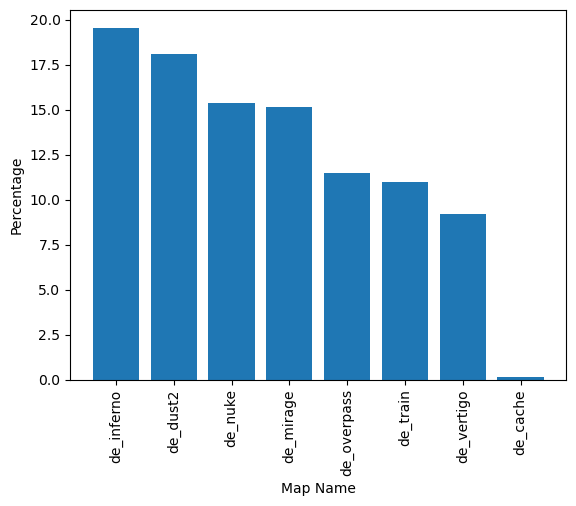

In [17]:
plt.bar(percentage.index, percentage.values)
plt.xticks(rotation =90)
plt.xlabel('Map Name')
plt.ylabel('Percentage')
plt.show()

#### According the plot above df_inferno is the map mostly occuring in the dataset

## Step:2) Pre-Processing

- Label Encoding

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117448 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     117448 non-null  float64
 1   ct_score                      117448 non-null  int64  
 2   t_score                       117448 non-null  int64  
 3   map                           117448 non-null  object 
 4   bomb_planted                  117448 non-null  bool   
 5   ct_health                     117448 non-null  int64  
 6   t_health                      117448 non-null  int64  
 7   ct_armor                      117448 non-null  int64  
 8   t_armor                       117448 non-null  int64  
 9   ct_money                      117448 non-null  int64  
 10  t_money                       117448 non-null  int64  
 11  ct_helmets                    117448 non-null  int64  
 12  t_helmets                     117448 non-null  in

In [19]:
col = ['map','bomb_planted','round_winner']


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for i in col:
    df[i] = le.fit_transform(df[i])
# le.fit_transform(df[i])(inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117448 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     117448 non-null  float64
 1   ct_score                      117448 non-null  int64  
 2   t_score                       117448 non-null  int64  
 3   map                           117448 non-null  int32  
 4   bomb_planted                  117448 non-null  int64  
 5   ct_health                     117448 non-null  int64  
 6   t_health                      117448 non-null  int64  
 7   ct_armor                      117448 non-null  int64  
 8   t_armor                       117448 non-null  int64  
 9   ct_money                      117448 non-null  int64  
 10  t_money                       117448 non-null  int64  
 11  ct_helmets                    117448 non-null  int64  
 12  t_helmets                     117448 non-null  in

In [23]:
df['map'].unique()

array([1, 3, 4, 2, 5, 7, 6, 0])

In [24]:
df['bomb_planted'].unique()

array([0, 1], dtype=int64)

In [25]:
df['round_winner'].unique()

array([0, 1])

**Pre-Processing : Standardization**

In [26]:
x = df.iloc[:, :-1]    # Independant Features [rows, columns except -1]
y = df.iloc[:, -1]    # Dependant Features  [rows, -1 column only] 


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [28]:
from sklearn.preprocessing  import StandardScaler

sc = StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
X_train

array([[-0.39531993,  1.50385553, -0.17324866, ..., -0.23279969,
        -0.16365591, -0.15395988],
       [ 0.28553596, -1.40971574, -1.21004374, ...,  0.96171704,
        -0.16365591, -0.15395988],
       [-0.74861371, -0.16104234,  0.86354643, ..., -0.23279969,
        -0.16365591, -0.15395988],
       ...,
       [-1.27151104, -0.78537904, -1.00268473, ..., -0.83005805,
        -0.16365591, -0.15395988],
       [-0.74748678, -0.57726681, -0.79532571, ..., -0.83005805,
        -0.16365591, -0.15395988],
       [ 0.00211209, -0.99349127,  0.44882839, ...,  0.96171704,
        -0.16365591, -0.15395988]])

In [31]:
X_test

array([[ 1.36777215,  1.72156096,  0.45121016, ..., -0.82621022,
        -0.16146396, -0.15815702],
       [-0.20526637,  1.9302991 ,  2.09337255, ...,  1.58236265,
        -0.16146396, -0.15815702],
       [ 1.51866043, -0.15708234, -1.39622254, ..., -0.82621022,
        -0.16146396, -0.15815702],
       ...,
       [ 1.51715531, -1.20077306, -0.57514134, ..., -0.82621022,
        -0.16146396, -0.15815702],
       [ 0.38944416,  0.88660838,  1.27229136, ...,  2.18450587,
        -0.16146396, -0.15815702],
       [-0.45643326,  1.09534652, -0.57514134, ..., -0.82621022,
        -0.16146396, -0.15815702]])

In [32]:
X_test.shape

(23490, 96)

In [33]:
X_train.shape

(93958, 96)

In [34]:
y_train.shape

(93958,)

In [35]:
y_test.shape

(23490,)

## Step:3) Apply LDA

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [37]:
# Coef is used to determine the importtance of a column in model building.
# Higher the coef value, the more imprtant the feature is.
# Used to decide the top features we can use to build the model.
ldacoef = lda.coef_
ldacoef

array([[ 1.46068416e-01, -1.79981222e-02,  1.77351414e-02,
        -8.67224071e-02,  2.40259891e-01, -4.36623808e-01,
         3.17367726e-01, -6.02802675e-01,  6.19799392e-01,
        -2.07677045e-01,  1.52433187e-01,  2.37444264e-02,
         9.44009109e-02, -2.80523218e-02, -2.12077160e-01,
         4.02809414e-01, -1.87828791e-01,  6.11511523e-01,
        -2.05500466e-01,  3.73324030e-02, -3.14049691e-01,
         2.57241803e-01, -1.54427353e-16, -1.92530779e-03,
         7.37890721e-03, -1.13270537e-02, -4.57198660e-03,
         1.52192197e-02, -1.37712411e-01,  4.56122855e-02,
         1.10033367e-15,  2.38636046e-02, -5.53498462e-02,
         1.36489653e-01,  2.18171571e-02, -1.83898210e-01,
         1.13668700e-02, -1.32059552e-15, -9.43173777e-02,
         4.47714845e-02, -4.57156908e-01,  1.08187526e-01,
        -8.82351236e-03,  1.12137478e-01, -1.56867660e-02,
         7.92363164e-03, -1.32619024e-02,  3.88951702e-02,
         2.50057208e-03, -6.78499674e-03, -1.20220507e-0

In [38]:
# Exponent use to neglect all negative values and reshape into 1D data
ldacoef = np.exp(np.abs(lda.coef_))  
ldacoef = ldacoef.flatten()       # use to convert any dimension into 1D
ldacoef

array([1.15727536, 1.01816106, 1.01789334, 1.0905939 , 1.27157958,
       1.54747382, 1.37350755, 1.82723277, 1.85855516, 1.23081561,
       1.16466464, 1.02402857, 1.09900026, 1.02844949, 1.23624327,
       1.49602174, 1.20662691, 1.84321536, 1.22813955, 1.03803801,
       1.36895776, 1.29335783, 1.        , 1.00192716, 1.0074062 ,
       1.01139145, 1.00458245, 1.01533562, 1.14764545, 1.04666852,
       1.        , 1.02415062, 1.05691031, 1.14624302, 1.02205689,
       1.20189348, 1.01143172, 1.        , 1.09890846, 1.04578885,
       1.57957671, 1.11425668, 1.00886255, 1.11866664, 1.01581045,
       1.00795511, 1.01335023, 1.03966149, 1.0025037 , 1.00680807,
       1.1277455 , 1.03832211, 1.        , 1.0077366 , 1.02177855,
       1.02020005, 1.02369284, 1.02088471, 1.        , 1.00706766,
       1.        , 1.01836713, 1.00823207, 1.01253391, 1.23746075,
       1.75726861, 1.08685935, 1.02823798, 1.05454614, 1.09572096,
       1.01873375, 1.00092001, 1.021589  , 1.02174358, 1.03549

In [39]:
df_lda_features = pd.DataFrame()
df_lda_features['Features_name'] = list(x.columns)
df_lda_features['Coef Value'] = ldacoef
df_lda_features

,Features_name,Coef Value
0,time_left,1.157275
1,ct_score,1.018161
2,t_score,1.017893
3,map,1.090594
4,bomb_planted,1.271580
...,...,...
91,t_grenade_incendiarygrenade,1.010311
92,ct_grenade_molotovgrenade,1.012270
93,t_grenade_molotovgrenade,1.099038
94,ct_grenade_decoygrenade,1.006165


In [40]:
# Selected top 20 Features
new_features_20 = df_lda_features.nlargest(20,'Coef Value')
new_features_20

,Features_name,Coef Value
8,t_armor,1.858555
17,t_weapon_ak47,1.843215
7,ct_armor,1.827233
65,t_weapon_sg553,1.757269
40,ct_weapon_m4a4,1.579577
5,ct_health,1.547474
15,t_players_alive,1.496022
6,t_health,1.373508
20,ct_weapon_awp,1.368958
21,t_weapon_awp,1.293358


In [41]:
new_col_20  = list(new_features_20.index)
new_col_20 

[8, 17, 7, 65, 40, 5, 15, 6, 20, 21, 89, 4, 64, 14, 9, 18, 16, 87, 35, 10]

In [42]:
x = df.iloc[:,[8, 17, 7, 65, 40, 5, 15, 6, 20, 21, 89, 4, 64, 14, 9, 18, 16, 87, 35, 10]]
y= df.iloc[ : , -1]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

### Model Building on 20 Features

In [52]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lg_m3 = LogisticRegression()
lg_m3.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred3 = lg_m3.predict(X_test)
y_pred3

array([1, 1, 0, ..., 1, 1, 0])

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred3)

0.7455512984248617

In [44]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_m1 = RandomForestClassifier()
rf_m1.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred1 = rf_m1.predict(X_test)
y_pred1

array([1, 1, 0, ..., 1, 1, 0])

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)


0.8532141336739038

**XGBoost**

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
import xgboost
xg_m2 = xgboost.XGBClassifier()
xg_m2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred2 =xg_m2.predict(X_test)
y_pred2

array([1, 1, 0, ..., 1, 1, 0])

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred2)


0.7905491698595147

**Conclusion: Random Forest HAs Highest Accuracy Score**